<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r15-i2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-15-m-1-r15.csv?token=AKVFSOGFDC75YKXKWNBM67C63JJVE')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-15-m-11-r15.csv?token=AKVFSOAFEHDGNJ6UICOJZQS63JJVK')

df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-4-m-1-r15.csv?token=AKVFSOBNA22AKZ5A7GS2KHC63JJVM')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-4-m-11-r15.csv?token=AKVFSOHBRFY5B2I4JOQNCKK63JJVS')

df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-6-m-1-r15.csv?token=AKVFSOAO6OGH5SOSF4HPWXK63JJVW')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-6-m-11-r15.csv?token=AKVFSOHAYSAW7BRAVDOG6TS63JJV4')

df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-9-m-1-r15.csv?token=AKVFSOHEWRSRFLKWFEVUENC63JJV6')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-9-m-11-r15.csv?token=AKVFSOCWPRWAMASKNUZN2UK63JJWC')

df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-normal-n-0-15-r15.csv?token=AKVFSOCRVU5HHXZ5Z37GBOK63JJWI')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-normal-n-0-4-r15.csv?token=AKVFSOC5RYQJMU2AIZ6UGJC63JJWM')
df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-normal-n-0-6-r15.csv?token=AKVFSODRSWN6WZDROVLWPPK63JJWQ')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-normal-n-0-9-r15.csv?token=AKVFSOFSNSJUT6DCGV5BNT263JJWY')

In [13]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df11.shape)
print(df12.shape)

(88036, 26)
(88873, 26)
(28382, 26)
(29188, 26)
(28382, 26)
(29188, 26)
(28382, 26)
(29188, 26)
(78463, 26)
(18792, 26)
(18792, 26)
(18792, 26)


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df5, ignore_index=True,sort=False)
df = df.append(df6, ignore_index=True,sort=False)
df = df.append(df7, ignore_index=True,sort=False)
df = df.append(df8, ignore_index=True,sort=False)
df = df.append(df9, ignore_index=True,sort=False)
df = df.append(df10, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)

df = df.sort_values('timestamp')
df.to_csv('fft-r12-train.csv',index=False)

In [15]:
df = pd.read_csv('fft-r12-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,7,3,0,1,1,4,3,9,15,15,23,7,3,2,0,0.0,4,63,1,63,63,0,12,3,27,0
1,7,3,0,1,1,4,3,9,15,15,23,7,3,2,0,0.0,4,60,1,60,60,0,12,3,27,0
2,7,3,0,1,1,4,3,9,15,15,23,7,2,2,0,0.0,4,62,1,62,62,0,8,3,27,1
3,62,0,3,4,1,1,5,17,23,7,15,15,3,2,2,1.0,12,62,2,63,124,0,12,20,340,0
4,62,0,3,4,1,1,5,17,23,7,15,15,2,2,2,1.0,12,61,2,62,122,0,8,20,340,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484453,3276881,3,0,5,3,2,3,9,15,15,27,11,30095,1,0,0.0,18,5,56,60,280,0,902850,15,135,0
484454,3276888,3,0,5,4,2,3,9,15,15,27,11,30095,1,0,0.0,25,4,57,60,228,0,1203800,15,135,0
484455,3276895,3,0,5,5,3,3,9,15,15,27,11,30095,1,0,0.0,32,3,58,60,174,0,2257125,15,135,0
484456,3276896,3,0,1,1,4,3,10,15,15,27,11,30096,1,0,0.0,32,2,59,60,118,0,120384,3,30,0


In [16]:
df.shape

(484458, 26)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-15-m-12-r15.csv?token=AKVFSOFCIIATN53BXPZZYAS63JK5C')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-15-m-7-r15.csv?token=AKVFSOGNEHOF57IWO2H7FXC63JK5G')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-4-m-12-r15.csv?token=AKVFSOCPIIFOLQNDQMMWWZK63JK5I')
df16 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-4-m-7-r15.csv?token=AKVFSOCB4H2XK6OOQSGGKMK63JK5M')
df17 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-6-m-12-r15.csv?token=AKVFSOF6O7SLN7ZGKZCOWK263JK5S')
df18 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-6-m-7-r15.csv?token=AKVFSOBBCKN5ZT36DWFVJ5263JK5W')
df19 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-9-m-12-r15.csv?token=AKVFSODMBWR2W3K6FF2UXBK63JK52')
df20 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r15/2-fft-malicious-n-0-9-m-7-r15.csv?token=AKVFSOFKHHH63FKPM45JO6S63JK6A')

In [18]:
print(df13.shape)
print(df14.shape)
print(df15.shape)
print(df16.shape)
print(df17.shape)
print(df18.shape)
print(df19.shape)
print(df20.shape)

(94994, 26)
(88862, 26)
(35144, 26)
(29188, 26)
(35150, 26)
(29220, 26)
(35150, 26)
(29188, 26)


In [19]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,749,3,4,2,1,4,3,9,30,14,27,11,25,2,1,0.50,8,3,1,3,3,12,200,6,54,0
1,804,3,4,2,1,4,3,9,30,14,27,11,26,2,1,0.50,8,2,2,3,4,12,208,6,54,0
2,861,3,4,2,1,4,3,9,30,14,27,11,28,2,1,0.50,8,1,3,3,3,12,224,6,54,0
3,1149,3,4,2,1,4,3,9,28,12,27,11,36,4,3,0.75,16,9,1,9,9,12,288,6,54,0
4,1222,3,4,2,1,4,3,9,28,12,27,11,38,4,3,0.75,16,8,2,9,16,12,304,6,54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,3265385,3,4,6,2,2,3,9,30,14,27,11,30079,2,1,0.50,15,5,8,12,40,12,721896,18,162,0
28378,3265392,3,4,6,3,2,3,9,30,14,27,11,30079,2,1,0.50,22,4,9,12,36,12,1082844,18,162,0
28379,3265399,3,4,6,4,2,3,9,30,14,27,11,30079,2,1,0.50,29,3,10,12,30,12,1443792,18,162,0
28380,3265406,3,4,6,5,3,3,9,30,14,27,11,30079,2,1,0.50,36,2,11,12,22,12,2707110,18,162,0


Processing

In [20]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [22]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.343915,0.202192,0.000340,-0.000515,-0.598961,-0.502748,0.031492,-0.126783,-0.648465,-0.779369,-0.090393,-0.072919,-0.066346,-0.100374,-0.074300,0.397801,0.089181,-0.172143,-0.450036,-0.016598
inport,-0.343915,1.000000,0.063523,0.013245,-0.020038,0.171362,-0.004060,0.028151,0.216434,0.596556,0.811097,0.287796,-0.114039,-0.162147,-0.199058,-0.149719,0.694000,0.036343,0.164813,0.114162,-0.038480
cache_coherence_type,0.202192,0.063523,1.000000,0.297439,-0.449990,-0.239144,-0.297482,0.049307,-0.041914,-0.073211,-0.102832,-0.298739,-0.039741,-0.089881,-0.093424,-0.068994,0.231668,0.322141,0.806557,0.278693,-0.025666
flit_id,0.000340,0.013245,0.297439,1.000000,-0.022075,0.124264,0.079372,0.007002,0.011386,0.035158,0.007855,0.425463,-0.000906,0.022709,0.015714,0.015180,0.018342,0.671647,0.358862,0.265321,0.008433
flit_type,-0.000515,-0.020038,-0.449990,-0.022075,1.000000,-0.187996,-0.120080,-0.010593,-0.017225,-0.053190,-0.011884,0.423471,-0.080559,0.048238,-0.023295,-0.019041,-0.027748,0.116880,-0.542915,-0.401399,-0.012759
vnet,-0.598961,0.171362,-0.239144,0.124264,-0.187996,1.000000,0.950651,-0.057308,0.067599,0.328846,0.486038,-0.152307,0.135080,0.172072,0.221376,0.165569,-0.315592,-0.078897,0.381120,0.852424,0.054379
vc,-0.502748,-0.004060,-0.297482,0.079372,-0.120080,0.950651,1.000000,-0.061920,0.009607,0.199353,0.318259,-0.178792,0.145872,0.202925,0.251391,0.189093,-0.408510,-0.107310,0.295529,0.821111,0.055538
traversal_id,0.031492,0.028151,0.049307,0.007002,-0.010593,-0.057308,-0.061920,1.000000,-0.011939,0.001212,0.004128,0.038243,0.095512,0.096374,0.138300,0.107122,0.055866,0.532729,0.012057,-0.034086,-0.286071
hop_count,-0.126783,0.216434,-0.041914,0.011386,-0.017225,0.067599,0.009607,-0.011939,1.000000,0.685728,0.336249,0.386522,-0.006709,-0.063482,-0.050589,-0.052610,0.008189,-0.020426,0.001247,0.012464,0.032270
current_hop,-0.648465,0.596556,-0.073211,0.035158,-0.053190,0.328846,0.199353,0.001212,0.685728,1.000000,0.807232,0.472224,-0.026361,-0.090878,-0.084499,-0.071703,0.057335,-0.016611,0.130501,0.224813,0.008387


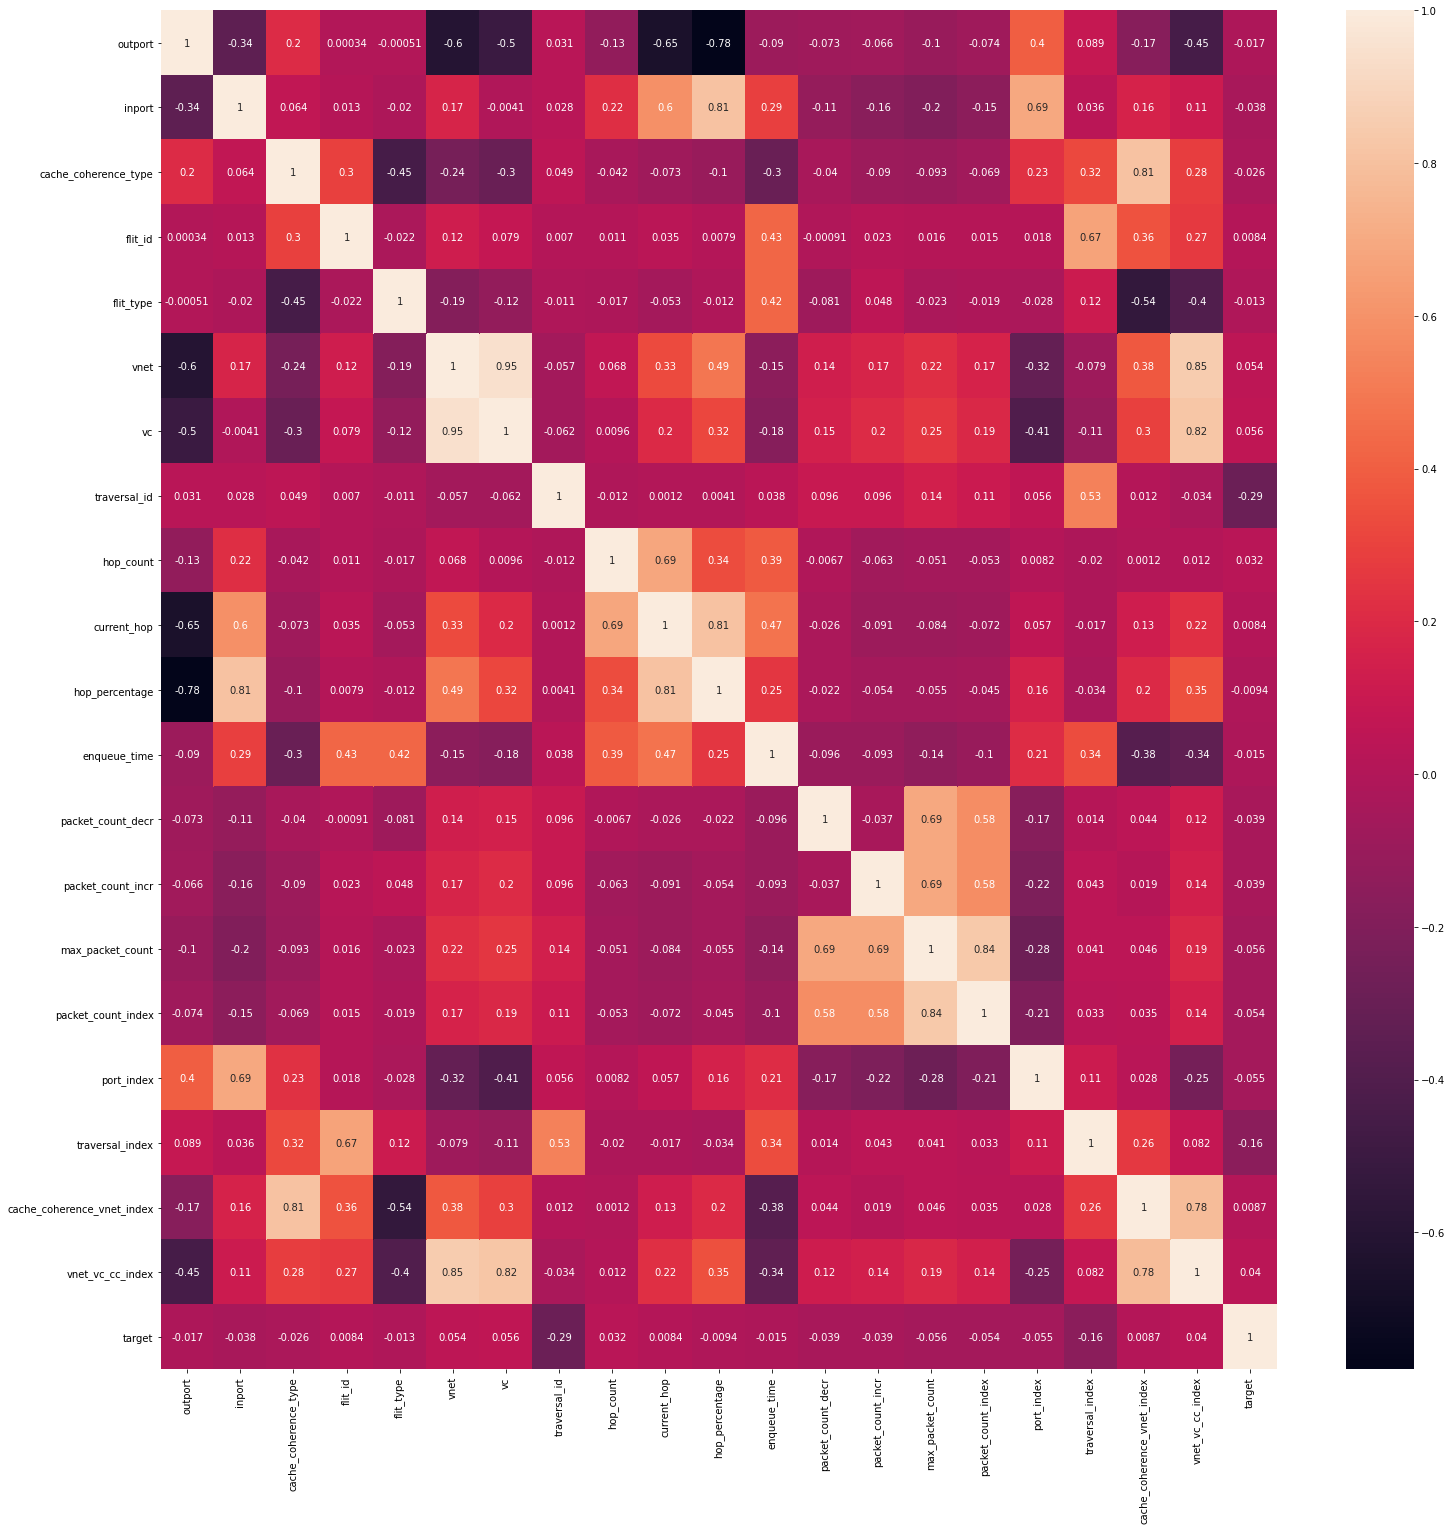

In [23]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [25]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet']

In [0]:
#df = df.drop(columns=[''])

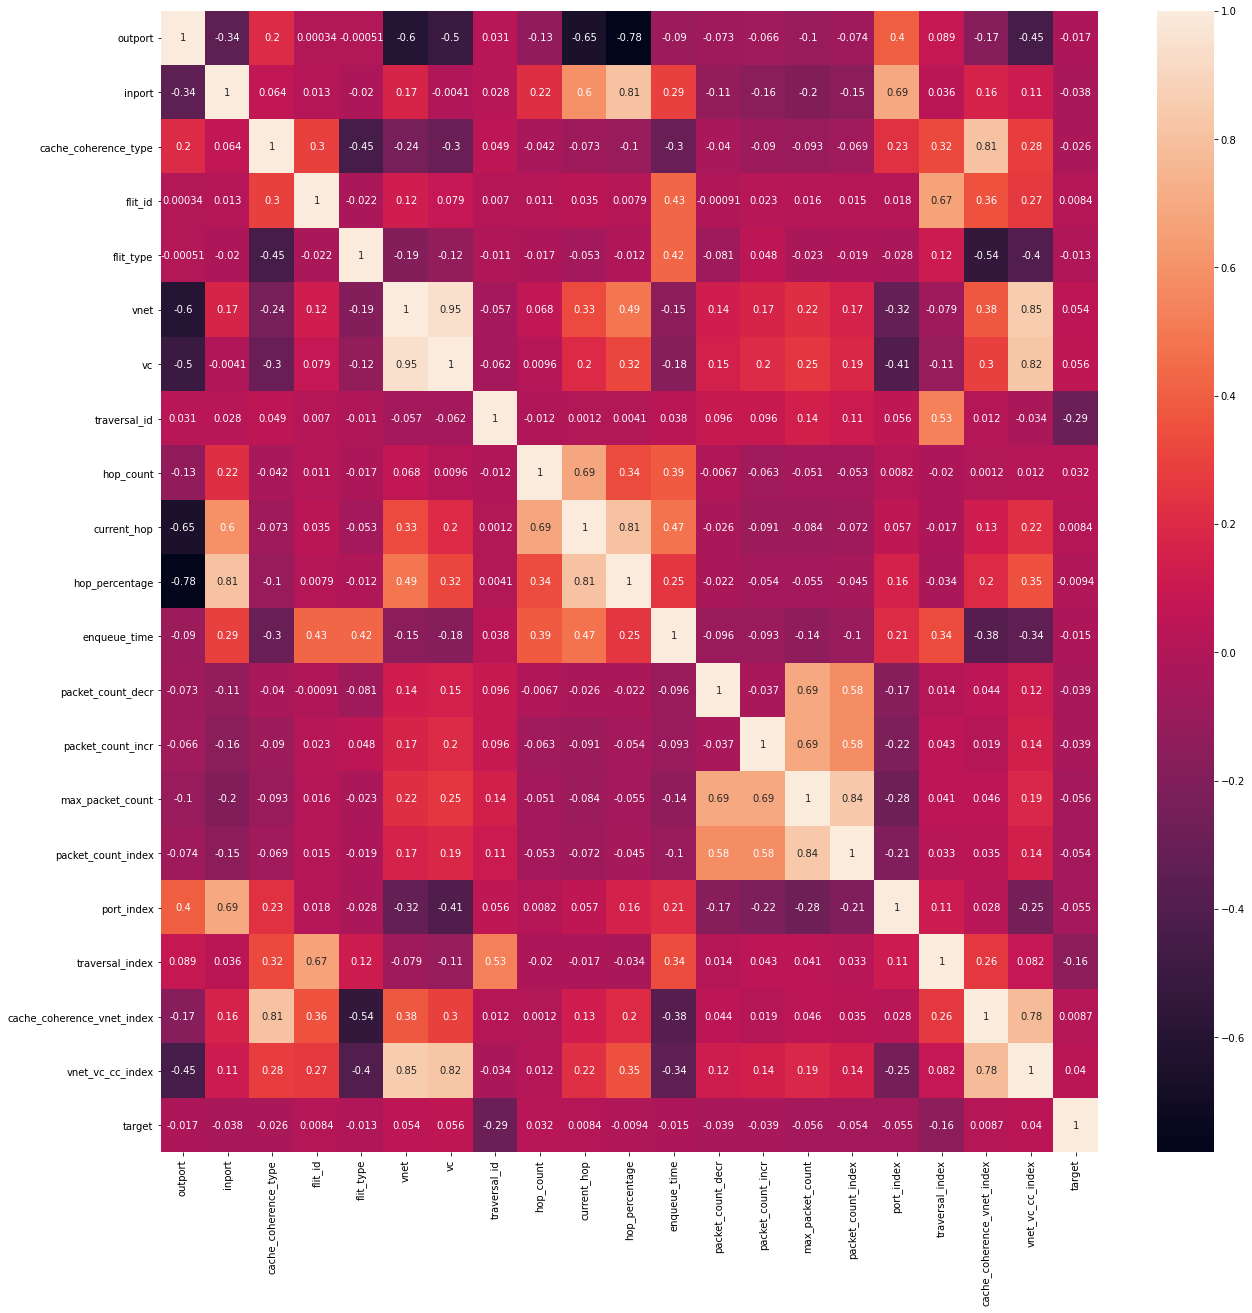

In [27]:
plt.figure(figsize=(21,21))
sns.heatmap(df.corr(), annot = True)
plt.show()

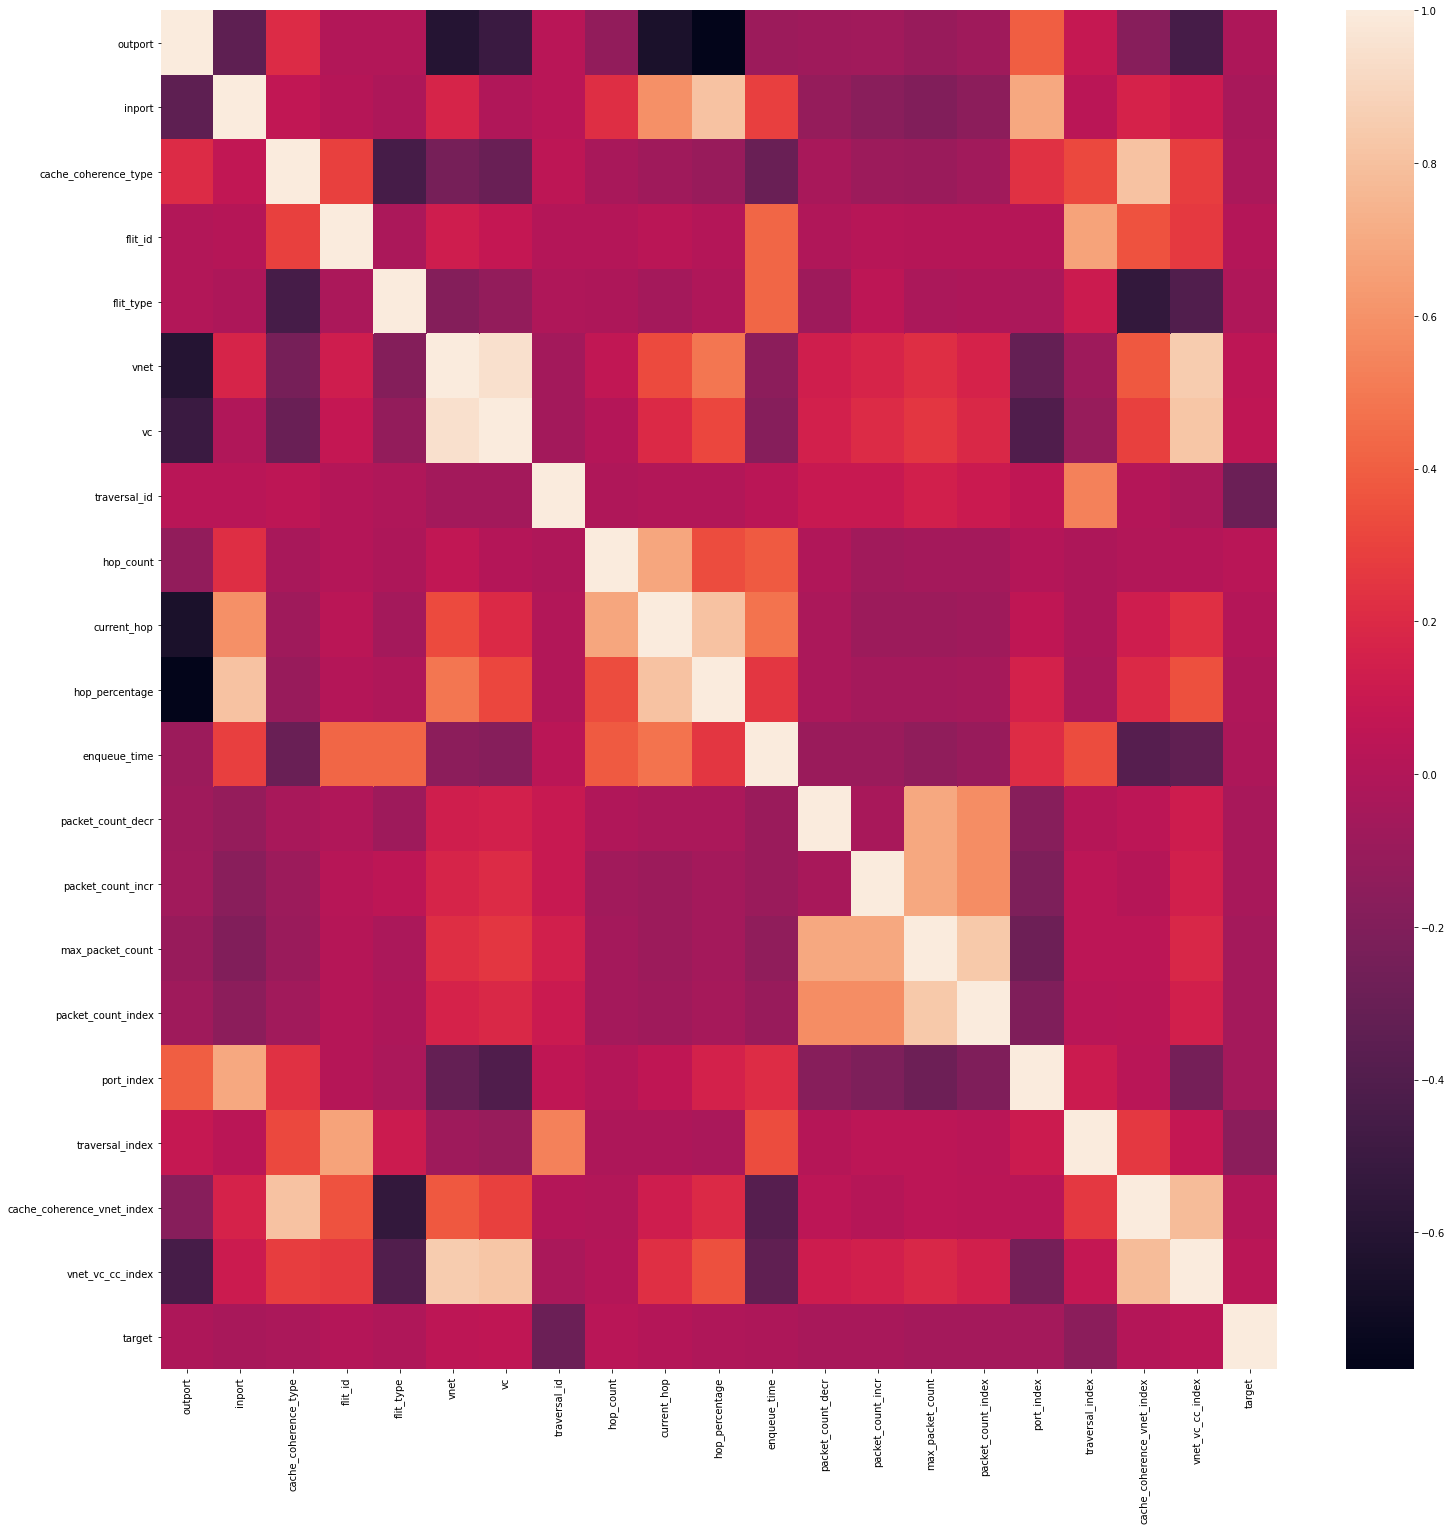

In [28]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [30]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index
0,0.75,0.00,0.000000,0.00,1.000000,0.0,0.000,0.000033,0.333333,0.000000,0.0,0.000000,0.405229,0.000000,0.405229,0.010325,0.0,0.000001,0.000000,0.000000
1,0.75,0.00,0.000000,0.00,1.000000,0.0,0.000,0.000033,0.333333,0.000000,0.0,0.000000,0.385621,0.000000,0.385621,0.009825,0.0,0.000001,0.000000,0.000000
2,0.75,0.00,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.333333,0.000000,0.0,0.000000,0.398693,0.000000,0.398693,0.010158,0.0,0.000000,0.000000,0.000000
3,0.00,0.75,0.500000,0.00,0.000000,1.0,1.000,0.000033,0.333333,0.333333,1.0,0.117647,0.398693,0.006536,0.405229,0.020483,0.0,0.000001,0.944444,1.000000
4,0.00,0.75,0.500000,0.00,0.000000,1.0,1.000,0.000000,0.333333,0.333333,1.0,0.117647,0.392157,0.006536,0.398693,0.020150,0.0,0.000000,0.944444,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484453,0.75,0.00,0.666667,0.50,0.333333,0.0,0.000,0.999967,0.166667,0.000000,0.0,0.205882,0.026144,0.359477,0.385621,0.046461,0.0,0.333442,0.666667,0.345048
484454,0.75,0.00,0.666667,0.75,0.333333,0.0,0.000,0.999967,0.166667,0.000000,0.0,0.308824,0.019608,0.366013,0.385621,0.037802,0.0,0.444591,0.666667,0.345048
484455,0.75,0.00,0.666667,1.00,0.666667,0.0,0.000,0.999967,0.166667,0.000000,0.0,0.411765,0.013072,0.372549,0.385621,0.028809,0.0,0.833610,0.666667,0.345048
484456,0.75,0.00,0.000000,0.00,1.000000,0.0,0.125,1.000000,0.166667,0.000000,0.0,0.411765,0.006536,0.379085,0.385621,0.019484,0.0,0.044458,0.000000,0.009585


In [31]:
train_X[train_X.duplicated()].shape

(4455, 20)

In [32]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 20)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index
0,0.75,0.00,0.000000,0.00,1.000000,0.0,0.0,0.000033,0.333333,0.000000,0.0,0.000000,0.411392,0.000000,0.411392,0.010158,0.0,0.000001,0.000000,0.000000
1,0.75,1.00,0.000000,0.00,1.000000,0.0,0.0,0.000000,0.833333,0.500000,0.6,0.179104,0.405063,0.006329,0.411392,0.020159,1.0,0.000000,0.000000,0.000000
2,0.00,0.75,0.500000,0.00,0.000000,1.0,1.0,0.000033,0.333333,0.333333,1.0,0.119403,0.398734,0.012658,0.411392,0.029848,0.0,0.000001,0.944444,1.000000
3,0.00,0.75,0.500000,0.25,0.333333,1.0,1.0,0.000033,0.333333,0.333333,1.0,0.134328,0.392405,0.018987,0.411392,0.039225,0.0,0.000015,0.944444,1.000000
4,0.00,0.75,0.500000,0.50,0.333333,1.0,1.0,0.000033,0.333333,0.333333,1.0,0.149254,0.386076,0.025316,0.411392,0.048289,0.0,0.000024,0.944444,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94989,0.00,0.75,0.500000,0.75,0.333333,1.0,1.0,0.999967,0.333333,0.333333,1.0,0.164179,0.025316,0.291139,0.316456,0.036568,0.0,0.355660,0.944444,1.000000
94990,0.00,0.75,0.500000,1.00,0.666667,1.0,1.0,0.999967,0.333333,0.333333,1.0,0.223881,0.018987,0.297468,0.316456,0.029848,0.0,0.666865,0.944444,1.000000
94991,0.75,0.00,0.666667,0.00,0.000000,0.0,0.0,1.000000,0.166667,0.000000,0.0,0.000000,0.012658,0.303797,0.316456,0.022816,0.0,0.055571,0.666667,0.345048
94992,0.75,0.00,0.666667,0.25,0.333333,0.0,0.0,1.000000,0.166667,0.000000,0.0,0.104478,0.006329,0.310127,0.316456,0.015471,0.0,0.222294,0.666667,0.345048


In [33]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 20)


In [34]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 20)


In [35]:
test_X3 = df16.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df16['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 20)


In [36]:
test_X4 = df17.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df17['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 20)


In [37]:
test_X5 = df18.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df18['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)

(0, 20)


In [38]:
test_X6 = df19.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df19['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)

(0, 20)


In [39]:
test_X7 = df20.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y7 = df20['target']
x = test_X7.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X7.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X7 = pd.DataFrame(x_scaled)
test_X7.columns = columns
print(test_X7[test_X7.duplicated()].shape)

(0, 20)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

Labels

1.   0 -  malicious
2.   1 -  good



In [41]:
train_Y = df['target']
train_Y.value_counts()

0    349619
1    134839
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                   Specs        Score
7           traversal_id  5075.526899
17       traversal_index  1863.504212
5                   vnet   978.887289
16            port_index   777.390489
6                     vc   669.218004
1                 inport   188.216813
15    packet_count_index   177.704138
14      max_packet_count   164.498233
19      vnet_vc_cc_index   101.651177
13     packet_count_incr    83.700013
12     packet_count_decr    80.810432
8              hop_count    53.455620
0                outport    28.257010
2   cache_coherence_type    26.608976
4              flit_type    17.290116
10        hop_percentage    14.021612
3                flit_id    12.498557


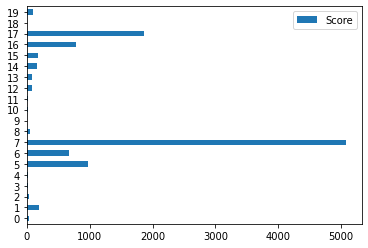

In [44]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [46]:
dt = DecisionTreeClassifier(max_depth=20,max_features=20,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r14.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [49]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 94.74953943328363
Test Prediction Score 93.96441398670686


In [50]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X7)
dt_score_test = accuracy_score(test_Y7,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 84.33585279070257
Test Prediction Score 88.52715446422543
Test Prediction Score 81.24288641019804
Test Prediction Score 82.92106345073319
Test Prediction Score 81.47652916073969
Test Prediction Score 81.90965092402465
Test Prediction Score 81.01280227596017
Test Prediction Score 84.52446210771551


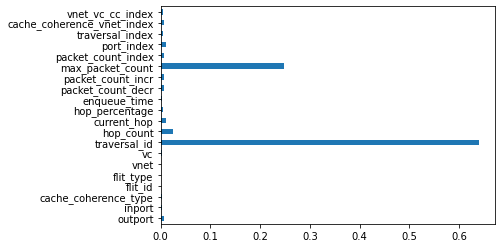

In [51]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

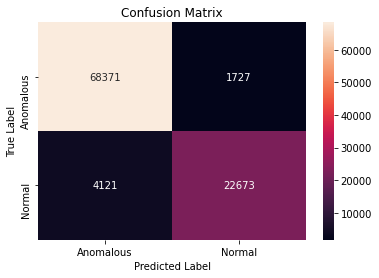

In [52]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [53]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     70098
           1       0.93      0.85      0.89     26794

    accuracy                           0.94     96892
   macro avg       0.94      0.91      0.92     96892
weighted avg       0.94      0.94      0.94     96892



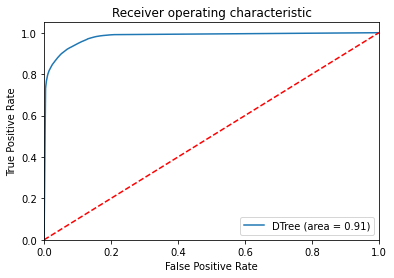

In [54]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [56]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r15.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [64]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.93859110448285
Test Prediction Score 99.43855013829831


In [65]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X7)
xgbc_score_test = accuracy_score(test_Y7,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 85.14432490473082
Test Prediction Score 89.96646485561882
Test Prediction Score 88.71215570225358
Test Prediction Score 89.9410716732904
Test Prediction Score 87.89473684210526
Test Prediction Score 90.11978097193702
Test Prediction Score 88.13371266002845
Test Prediction Score 91.40057557900508


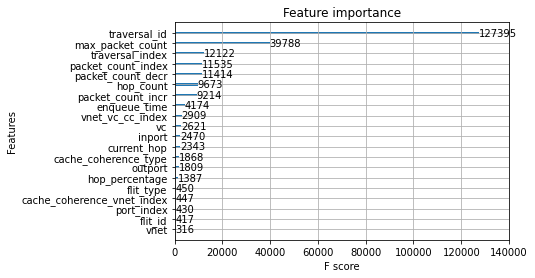

In [66]:
plot_importance(xgbc)
plt.show()

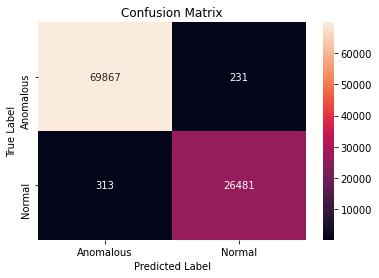

In [67]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [68]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70098
           1       0.99      0.99      0.99     26794

    accuracy                           0.99     96892
   macro avg       0.99      0.99      0.99     96892
weighted avg       0.99      0.99      0.99     96892



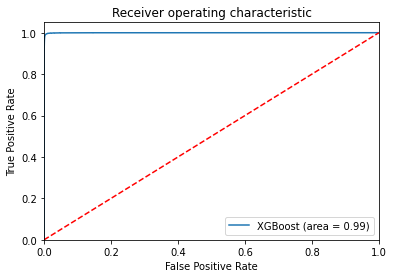

In [69]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()